# Domácí úkol č. 1 - 🕵️‍♀️ Explorační analýza dat

## 📚 Data
V souborech `intakes.csv` a `outcomes.csv` naleznete data z útulku ve městě Austin, Texas USA. Data pocházejí z oficiálního [zdroje otevřených dat města Austin](https://data.austintexas.gov/).

Dataset [intakes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) obsahuje data o přijatých zvířatech od 1. 10. 2013 do 27. 4 2022. Dataset [outcomes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238) obsahuje údaje o zvířatech, která útulek opustila (např. byla adoptována, vrácena majiteli a podobně) za tentýž časový interval. Může se stát, že zvířata přijatá do 1. 10. 2013 se nevyskytují v `intakes.csv` (data se ještě neshromažďovala), ale budou mít záznam v `outcomes.csv`, pokud útulek po tomto datu opustila.

☝️ Každý dataset může **stejné zvíře obsahovat víckrát** (1. některá zvířata se do útulku vracela - to je trochu komplikace, pokud byste datasety chtěli spojit - pro řešení úkolu spojování ale není nutné, 2. některé záznamy jsou duplicitní - ty můžete odstranit, jedná se o chybu). 

## Zadání
> ☝️ Používejte markdown buňky! Zdůvodňujte všechny důležité kroky, popisujte vizualizace a co je z nich možné pozorovat. Za nepřehledný domácí úkol nebudou uděleny body.

Za řádné průběžné komentování a vizuální prezentaci postupu a výsledků lze získat až 3 body.

**✨ Příprava dat** (celkem 4 body)
* Importujte potřebné balíčky.
* Načtěte si datasety intakes a outcomes z příslušných csv souborů.
* Seznamte se s oběma datasety a svá zjištění komentujte:
  * Příklad informací, které lze zjistit: počet řádků datasetu, počet a význam příznaků, datový typ příznaků a počet jejich unikátních hodnot, ...
* Vyčistěte a zkonvertujte data:
  * Zjistěte jakým způsobem jsou v datasetu uváděny chybějící hodnoty a v případě potřeby je přepište na NaN.
  * Zkonvertujte kategorické příznaky na typ category.
  * Převeďte příznak Age upon Intake/Outcome na numerický příznak.
  * Převeďte příznak DateTime na typ datetime64.
  * Proveďte všechny další úpravy, které vám dávají smysl (konverze dalších příznaků, odstranění duplicitních údajů, přidání nových příznaků, ...).
  
**🖊️ Deskriptivní statistiky** (celkem 6 bodů)

Volbu vhodných statistik pro daný typ dat komentujte a pokud je to možné, využívejte co nejvíce vizualizace.
* Popište příznaky Age upon Intake a DateTime (původně z datasetu intakes) pomocí univariačních deskriptivních statistik.
* Vyberte si tři další příznaky a popište je pomocí univariačních deskriptivních statistik, které jsou pro ně vhodné.
* Vyberte si dva příznaky, mezi kterými by mohl být nějaký vztah (např. korelace) a popište tento vztah pomocí bivariačních deskriptivních statistik. Dvojice typu Age upon Intake a Age upon Outcome neuznáváme.

**❓ Zadané otázky** (2 body za každou otázku, celkem max. 6 bodů)

Pomocí vhodných vizualizací odpovídejte na následující otázky:
* Závisí typ odchodu zvířete z útulku (Outcome Type) na typu příchodu (Intake Type)? Pokud chcete, uvažujte pro zjednodušení pouze zvířata, která se v každém datasetu vyskytují právě jednou.
* Hraje věk zvířete roli při adopci?
* Je příjem zvířat v rámci roku konstantní nebo existují období s větší/nižší zátěží?

K jedné otázce můžete v případě potřeby vytvořit více vizualizací. Výsledek vizualizace a všechny mezikroky komentujte.

**❓ Vlastní otázky** (2 body za každou otázku, celkem max. 6 bodů)

Vymyslete **minimálně tři** vlastní otázky a odpovídejte na ně vhodnými vizualizacemi. Otázky můžete postavit na již zmíněných datasetech. Také je možné využít třetí dataset [locations](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Found-Pets-Map/hye6-gvq2), který naleznete v souboru locations.csv, nebo si můžete stáhnout nějaká další zajímavá data, která souvisí s tímto tématem.

Dataset locations poskytuje informace o všech toulavých kočkách a psech, které jsou v databázi útulku **méně než týden**. Většina se nachází v útulku, ale část z nich je u dobrovolníků – tato informace je uvedena ve sloupci At AAC (AAC – Austin Animal Center).

### Bodové hodnocení
Shrnutí bodů, které můžete nejvýše získat:
- 3 body za komentáře a vizuální prezentaci postupu a výsledků,
- 4 body za přípravu dat,
- 6 bodů za deskriptivní statistiku,
- 6 bodů za zodpovězení všech zadaných otázek,
- 6 bodů za definici a zodpovězení minimálně tří vlastních otázek.

Celkem lze za domácí úkol č. 1 získat maximálně 25 bodů.

In [1]:
# a teď už je to na vás 💪
# níže vložte své řešení

# ✨ Příprava dat ✨


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec

In [35]:
# Načtěme data z CSV souboru intakes.csv a outcomes.csv
df_in = pd.read_csv("intakes.csv")
df_out = pd.read_csv("outcomes.csv")

## První pohled

In [36]:
# Podívejme se na pár prvních záznamu dat
df_in.head(10)

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,July 2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,April 2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,October 2013,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,06/29/2014 10:38:00 AM,June 2014,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray
5,A743852,Odin,02/18/2017 12:46:00 PM,February 2017,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,2 years,Labrador Retriever Mix,Chocolate
6,A635072,Beowulf,04/16/2019 09:53:00 AM,April 2019,415 East Mary Street in Austin (TX),Public Assist,Normal,Dog,Neutered Male,6 years,Great Dane Mix,Black
7,A844350,*Ella,10/15/2021 11:40:00 AM,October 2021,2112 East William Cannon Drive in Austin (TX),Stray,Normal,Cat,Intact Female,6 months,Domestic Shorthair,Brown Tabby
8,A708452,Mumble,07/30/2015 02:37:00 PM,July 2015,Austin (TX),Public Assist,Normal,Dog,Intact Male,2 years,Labrador Retriever Mix,Black/White
9,A818975,NaN,06/18/2020 02:53:00 PM,June 2020,Braker Lane And Metric in Travis (TX),Stray,Normal,Cat,Intact Male,4 weeks,Domestic Shorthair,Cream Tabby


In [37]:
df_out.head(10)

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,03/18/2014 11:47:00 AM,Mar 2014,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby
5,A659412,Princess,10/05/2020 02:37:00 PM,Oct 2020,03/24/2013,Adoption,NaN,Dog,Spayed Female,7 years,Chihuahua Shorthair Mix,Brown
6,A814515,Quentin,05/06/2020 07:59:00 AM,May 2020,03/01/2018,Adoption,Foster,Dog,Neutered Male,2 years,American Foxhound/Labrador Retriever,White/Brown
7,A689724,*Donatello,10/18/2014 06:52:00 PM,Oct 2014,08/01/2014,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black
8,A680969,*Zeus,08/05/2014 04:59:00 PM,Aug 2014,06/03/2014,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,White/Orange Tabby
9,A840370,Tulip,08/19/2021 07:36:00 PM,Aug 2021,08/06/2019,Adoption,NaN,Dog,Spayed Female,2 years,Border Collie/Cardigan Welsh Corgi,Black/White


>️️️️️️️☝️Některá jmena mají na začátku hvězdičku.

In [38]:
# Základní informace o dataframu (typy sloupců, počty hodnot)
df_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138585 entries, 0 to 138584
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138585 non-null  object
 1   Name              97316 non-null   object
 2   DateTime          138585 non-null  object
 3   MonthYear         138585 non-null  object
 4   Found Location    138585 non-null  object
 5   Intake Type       138585 non-null  object
 6   Intake Condition  138585 non-null  object
 7   Animal Type       138585 non-null  object
 8   Sex upon Intake   138584 non-null  object
 9   Age upon Intake   138585 non-null  object
 10  Breed             138585 non-null  object
 11  Color             138585 non-null  object
dtypes: object(12)
memory usage: 12.7+ MB


In [39]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138769 entries, 0 to 138768
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138769 non-null  object
 1   Name              97514 non-null   object
 2   DateTime          138769 non-null  object
 3   MonthYear         138769 non-null  object
 4   Date of Birth     138769 non-null  object
 5   Outcome Type      138746 non-null  object
 6   Outcome Subtype   63435 non-null   object
 7   Animal Type       138769 non-null  object
 8   Sex upon Outcome  138768 non-null  object
 9   Age upon Outcome  138764 non-null  object
 10  Breed             138769 non-null  object
 11  Color             138769 non-null  object
dtypes: object(12)
memory usage: 12.7+ MB


> **☝️ Pozorování ☝️**
>
>V dataframe df_in je 138585 záznamu, v df_out - 138769, v obou je 12 sloupců.
>
>0. Animal ID: Unikátní identifikátor zvířete. 
>1. Name: Jméno zvířete. df_in - Name: celkem 97316 non-null hodnot, df_out - 97514. Toto znamená, že některá zvířata nemají zaznamenané jméno.
>2. DateTime: Datum a čas, kdy bylo zvíře přijato/opuštěno. Všechny záznamy mají tuto hodnotu v obou dataframech.
>3. MonthYear: Vypadá to, že je to podobné jako DateTime, ale možná v jiném formátu. Tato data víme ze sloupce "DateTime" Možná tento sloupec nepotřebujeme a můžeme jej odsranit. Obsahuje stejný počet ne-null hodnot jako DateTime.
>4. df_in - Found Location: Místo, kde bylo zvíře nalezeno. df_out - Date of Birth: narozeniny zvířete. 0 null hodnot. 
>5. df_in - Intake Type: Typ při přijetí, např. "Stray", df_out - Outcome Type: typ při opuštění útulku.
>6. df_in - Intake Condition: Stav zvířete při přijetí, např. "Normal" nebo "Sick". df_out - Outcome Subtype: stav při opuštění útulku.
>7. Animal Type: Typ zvířete, např. "Dog" nebo "Cat".
>8. Sex upon Intake/Outcome: Pohlaví a stav zvířete při přijetí/opuštění, např. "Neutered Male" nebo "Intact Female". U jedneho záznamu chybí v obou dataframech.
>9. Age upon Intake/Outcome: Věk zvířete při přijetí/opuštění.
>10. Breed: Plemeno zvířete.
>11. Color: Barva zvířete.

In [40]:
# Získejme základní statistiky o datech
df_in.describe()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
count,138585,97316,138585,138585,138585,138585,138585,138585,138584,138585,138585,138585
unique,123890,23544,97442,103,58367,6,15,5,5,54,2741,616
top,A721033,Max,09/23/2016 12:00:00 PM,June 2015,Austin (TX),Stray,Normal,Dog,Intact Male,1 year,Domestic Shorthair Mix,Black/White
freq,33,624,64,2189,26051,95283,119320,78145,45635,23667,32194,14470


In [41]:
df_out.describe()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
count,138769,97514,138769,138769,138769,138746,63435,138769,138768,138764,138769,138769
unique,124068,23425,115364,103,7576,9,26,5,5,54,2749,619
top,A721033,Max,04/18/2016 12:00:00 AM,Jun 2019,05/01/2016,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,33,621,39,2244,119,63518,33597,78138,48877,24024,32515,14481


> **☝️Pozorování:☝️**
> 1. df_in - Animal ID: 123890 unikátních hodnot. df_out - 124068 unikátních hodnot. Některá zvířata mohla být přijata/opoustila vícekrát nebo/a jsou duplicitní záznamy.
> 2. Name: df_in - 23544 unikátních jmen. df_out - 23425.
> 3. DateTime: df_in - 97429 unikátních hodnot. df_out - 115364. Nejčastěji se vyskytující čas je 12:00 PM.
> 4. df_in - Found Location: 58367 unikátních míst, což ukazuje, že mnoho zvířat bylo nalezeno na stejném místě. S vysokým počtem >jedinečných hodnot může být tento příznak považován za textový nebo kategorický v závislosti na konkrétním využití.
> 5. df_out - Date of Birth: 7576 unikátních z 138769. Převedeme na kategorický?
> 6. df_in - Intake Type: 6 unikátních hodnot. Nejčastější je "Stray", což je logicky pro útulek
> 7. Animal Type: 5 druhů zvířat, nejč. je "Dog".
> 8. Breed a Color mají mnoho unikatních hodnot. Nejsem si jistý, že určitě je převedu na kategorické příznaky.

## Null hodnoty

In [42]:
def find_none(df):

    # Hledáni null-hodnot ve sloupcích
    common_missing_indicators = ['?', 'Unknown', 'N/A', 'None', 'NaN', '', "Nan", "nan"] # můj odhad a to, co jsem videl v záznamech
    
    for column in df.columns:
        unique_values = df[column].unique()
        missing_values = df[column].isnull().sum()
        
        print(f"Column: {column}")
        print(f"Number of unique values: {len(unique_values)}")
        print(f"Number of missing values: {missing_values}")
        
        # Hledáme častá slova, která představují null hodnoty
        for indicator in common_missing_indicators:
            if indicator in unique_values:
                print(f"Contains indicator for missing value: {indicator}")
        
        print("First 50 unique values:", unique_values[:50])
        print('---' * 10)

In [43]:
find_none(df_in)

Column: Animal ID
Number of unique values: 123890
Number of missing values: 0
First 50 unique values: ['A786884' 'A706918' 'A724273' 'A665644' 'A682524' 'A743852' 'A635072'
 'A844350' 'A708452' 'A818975' 'A774147' 'A731435' 'A760053' 'A707375'
 'A696408' 'A790209' 'A743114' 'A657188' 'A783861' 'A707658' 'A736287'
 'A697950' 'A831808' 'A298074' 'A836850' 'A754715' 'A815227' 'A810994'
 'A769764' 'A707974' 'A682230' 'A830990' 'A749436' 'A722979' 'A803723'
 'A696205' 'A759935' 'A666877' 'A794334' 'A706507' 'A732903' 'A789526'
 'A749400' 'A727838' 'A821389' 'A769816' 'A701811' 'A812244' 'A700396'
 'A724378']
------------------------------
Column: Name
Number of unique values: 23545
Number of missing values: 41269
Contains indicator for missing value: Unknown
Contains indicator for missing value: Nan
First 50 unique values: ['*Brock' 'Belle' 'Runster' nan 'Rio' 'Odin' 'Beowulf' '*Ella' 'Mumble'
 '*Casey' '*Candy Cane' '*Pearl' 'Ziggy' 'Tommy' 'Tulip' '*Mint'
 '*Twilight' 'Stumpy' 'Rheia' 'Ba

In [44]:
# Zmeníme nalezeńe null-hodnoty na np.nan
df_in = df_in.replace(["Unknown", "Other", "Nan"], np.nan)

In [45]:
find_none(df_out)

Column: Animal ID
Number of unique values: 124068
Number of missing values: 0
First 50 unique values: ['A794011' 'A776359' 'A821648' 'A720371' 'A674754' 'A659412' 'A814515'
 'A689724' 'A680969' 'A840370' 'A684617' 'A742354' 'A818049' 'A843327'
 'A681036' 'A803149' 'A698049' 'A773792' 'A833999' 'A725795' 'A730621'
 'A765349' 'A760697' 'A767231' 'A758536' 'A754682' 'A801106' 'A766700'
 'A812473' 'A740079' 'A757919' 'A789298' 'A773866' 'A765701' 'A699884'
 'A725530' 'A722378' 'A707743' 'A681449' 'A738919' 'A730464' 'A805930'
 'A672423' 'A665383' 'A806497' 'A754899' 'A746498' 'A813785' 'A810161'
 'A791163']
------------------------------
Column: Name
Number of unique values: 23426
Number of missing values: 41255
Contains indicator for missing value: Unknown
Contains indicator for missing value: Nan
First 50 unique values: ['Chunk' 'Gizmo' nan 'Moose' 'Princess' 'Quentin' '*Donatello' '*Zeus'
 'Tulip' 'Artemis' 'Fiona' '*Mary' '*Birch' 'Luigi' '*Liza' 'Einstein'
 'Star' 'Millie' 'Big Girl' 

In [46]:
df_out = df_out.replace(["Unknown", "Other", "Nan"], np.nan)

## Kategorické příznaky

In [47]:
# Převedu vhodné příznaky na kategorické
columns_to_convert_in = ['Intake Type', 'Intake Condition', 'Animal Type', 'Sex upon Intake']
columns_to_convert_out = ['Outcome Type', 'Outcome Subtype', 'Animal Type', 'Sex upon Outcome']
for col in columns_to_convert_in:
    df_in[col] = df_in[col].astype('category')
for col in columns_to_convert_out:
    df_out[col] = df_out[col].astype('category')

## Převod příznaku Age upon Intake/Outcome na numerický příznak

In [48]:
df_in['Age upon Intake'].unique()

array(['2 years', '8 years', '11 months', '4 weeks', '4 years', '6 years',
       '6 months', '5 months', '14 years', '1 month', '2 months',
       '18 years', '9 years', '4 months', '1 year', '3 years', '4 days',
       '1 day', '5 years', '2 weeks', '15 years', '7 years', '3 weeks',
       '3 months', '12 years', '1 week', '9 months', '10 years',
       '10 months', '7 months', '8 months', '1 weeks', '5 days',
       '0 years', '2 days', '11 years', '17 years', '3 days', '13 years',
       '5 weeks', '19 years', '6 days', '16 years', '20 years',
       '-1 years', '22 years', '23 years', '-2 years', '21 years',
       '-3 years', '25 years', '24 years', '30 years', '28 years'],
      dtype=object)

In [49]:
df_out['Age upon Outcome'].unique()

array(['2 years', '1 year', '4 months', '6 days', '7 years', '2 months',
       '2 days', '3 weeks', '9 months', '4 weeks', '2 weeks', '3 months',
       '9 years', '10 years', '6 months', '8 years', '3 years',
       '7 months', '6 years', '4 years', '1 month', '12 years', '5 years',
       '1 weeks', '5 months', '5 days', '15 years', '11 months',
       '10 months', '4 days', '16 years', '1 day', '8 months', '11 years',
       '13 years', '1 week', '14 years', '3 days', '0 years', '5 weeks',
       '17 years', '18 years', '20 years', '22 years', '-2 years',
       '19 years', '23 years', '24 years', '-1 years', '25 years',
       '21 years', '-3 years', '30 years', nan, '28 years'], dtype=object)

>☝️ Vypsal jsem unikátní hodnoty a zjistil, že máme záporný čas. Těchto hodnot není mnoho, takže se je pokusím nahradit na np.nan. 

In [50]:
def age_to_days(age_str):
    '''Rozdělení hodnoty na číslo a jednotku'''
    
    if pd.isnull(age_str) or '-' in age_str:
        return np.nan

    num, unit = age_str.split(" ", 1)

    # Převod jednotky na počet dnů, používáme přibližné hodnoty
    if "year" in unit:
        return float(num)
    elif "month" in unit:
        return float(num) / 12
    elif "week" in unit:
        return float(num) / 52
    elif "day" in unit:
        return float(num) / 365
    else:
        return np.nan # neznáma jednotka

In [51]:
# Převod příznaku Age upon Intake na čast roku (flaot)
df_in['Age upon Intake'] = df_in['Age upon Intake'].apply(age_to_days)

# Pokud máte také příznak Age upon Outcome na čast roku (flaot)
df_out['Age upon Outcome'] = df_out['Age upon Outcome'].apply(age_to_days)

## Převedení sloupce 'DateTime' na typ datetime64

In [52]:
# připomeňme si časový formát
df_in["DateTime"].iloc[0:2]

0    01/03/2019 04:19:00 PM
1    07/05/2015 12:59:00 PM
Name: DateTime, dtype: object

In [53]:
df_out["DateTime"].iloc[0:2]

0    05/08/2019 06:20:00 PM
1    07/18/2018 04:02:00 PM
Name: DateTime, dtype: object

In [54]:
# vidíme, že format je mm/dd/yyyy hh:mm:ss AM/PM
df_in['DateTime'] = pd.to_datetime(df_in['DateTime'], format='%m/%d/%Y %I:%M:%S %p')
df_out['DateTime'] = pd.to_datetime(df_out['DateTime'], format='%m/%d/%Y %I:%M:%S %p')

In [55]:
# Kontrolování
display(df_in.dtypes)
print("-------------------------------------")
display(df_out.dtypes)

Animal ID                   object
Name                        object
DateTime            datetime64[ns]
MonthYear                   object
Found Location              object
Intake Type               category
Intake Condition          category
Animal Type               category
Sex upon Intake           category
Age upon Intake            float64
Breed                       object
Color                       object
dtype: object

-------------------------------------


Animal ID                   object
Name                        object
DateTime            datetime64[ns]
MonthYear                   object
Date of Birth               object
Outcome Type              category
Outcome Subtype           category
Animal Type               category
Sex upon Outcome          category
Age upon Outcome           float64
Breed                       object
Color                       object
dtype: object

## Další úpravy

**Duplicity**

In [56]:
# Podívejme se, jestli máme duplicitní data
in_duplicates_count = len(df_in)- len(df_in.drop_duplicates ())
out_duplicates_count = len(df_out)- len(df_out.drop_duplicates ())
print(f"Number of duplicate rows in df_in: {in_duplicates_count}")
print(f"Number of duplicate rows in df_out: {out_duplicates_count}")

Number of duplicate rows in df_in: 20
Number of duplicate rows in df_out: 17


In [57]:
df_in = df_in.drop_duplicates()
df_out = df_out.drop_duplicates()

In [58]:
# Kontrolováni
print(len(df_in)- len(df_in.drop_duplicates ()))
print(len(df_out)- len(df_out.drop_duplicates ()))

0
0


**Odsranění zbytečných dat**

In [59]:
df_in = df_in.drop('MonthYear', axis=1)
df_out = df_out.drop('MonthYear', axis=1)

> ☝️ Podle mého mínění tyto sloupce nepotřebujeme, jelikož sloupec "DateTime" obsahuje tuto informaci

In [60]:
df_in.head(2)

,Animal ID,Name,DateTime,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,2019-01-03 16:19:00,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2.0,Beagle Mix,Tricolor
1,A706918,Belle,2015-07-05 12:59:00,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8.0,English Springer Spaniel,White/Liver


In [61]:
df_out.head(2)

,Animal ID,Name,DateTime,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,2019-05-08 18:20:00,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2.0,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,2018-07-18 16:02:00,07/12/2017,Adoption,NaN,Dog,Neutered Male,1.0,Chihuahua Shorthair Mix,White/Brown


## Kontrola

In [62]:
df_in.info()
print("------------------------------------")
display(df_out.info())

<class 'pandas.core.frame.DataFrame'>
Index: 138565 entries, 0 to 138584
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         138565 non-null  object        
 1   Name              97278 non-null   object        
 2   DateTime          138565 non-null  datetime64[ns]
 3   Found Location    138565 non-null  object        
 4   Intake Type       138565 non-null  category      
 5   Intake Condition  138320 non-null  category      
 6   Animal Type       131193 non-null  category      
 7   Sex upon Intake   127498 non-null  category      
 8   Age upon Intake   138557 non-null  float64       
 9   Breed             138562 non-null  object        
 10  Color             138565 non-null  object        
dtypes: category(4), datetime64[ns](1), float64(1), object(5)
memory usage: 9.0+ MB
------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 138752 entrie

None

> A pojdme začít pracovat s daty

# 🖊️ Deskriptivní statistiky 🖊️

In [63]:
# styling
sns.set_style("whitegrid")

# paleta barev
color_palettes = {
    "deep": sns.color_palette("deep"),
    "muted": sns.color_palette("muted"),
    "pastel": sns.color_palette("pastel"),
    "dark": sns.color_palette("dark"),
    "colorblind": sns.color_palette("colorblind"),
    "hls": sns.color_palette("hls", 10),
    "husl": sns.color_palette("husl", 10),
    "Set1": sns.color_palette("Set1"),
    "Set2": sns.color_palette("Set2"),
    "Set3": sns.color_palette("Set3")
}

palette = sns.color_palette("hls", 10)
sns.set_palette(palette)

## Age upon intake

In [64]:
# univariační popisné statistiky pro spojité příznaky
def univariate_cont_ds(df, column, palette_name='deep'):

    '''popis a vizualizace spojitých příznaků'''
    #převzato z cvičení 2
    
    # Nastavení stylu a palety barev
    sns.set_style("whitegrid")
    sns.set_palette(palette_name)

    # Výstup statistických informací
    stats_df = pd.DataFrame(np.array([
        ["Minimal value", df[column].min()], 
        ["Maximal value", df[column].max()], 
        ["Range", df[column].max() - df[column].min()],
        ["Average", df[column].mean()],
        ["Median", df[column].median()],
        ["Variance", df[column].var()]
    ]), columns=['Title', 'Value'])
    
    display(stats_df)

    # figure layout initialization
    fig = plt.figure(figsize=(10,10), constrained_layout=True)
    spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
    ax1 = fig.add_subplot(spec[0, :]) 
    ax2 = fig.add_subplot(spec[1, 0]) 
    ax3 = fig.add_subplot(spec[1, 1])
    
    sns.histplot(data=df, x=column, bins = 30, kde=False, ax=ax1) # kde!!
    
    # x and y - rotation of plots
    sns.boxplot(data=df, y=column, ax=ax2, medianprops={"color": "black"})
    sns.violinplot(data=df, y=column, ax=ax3)

    # zpátky na defaultní
    sns.set()
    sns.set_style("whitegrid")


,Title,Value
0,Minimal value,0.0
1,Maximal value,30.0
2,Range,30.0
3,Average,2.0291401430012055
4,Median,1.0
5,Variance,8.167120184492138


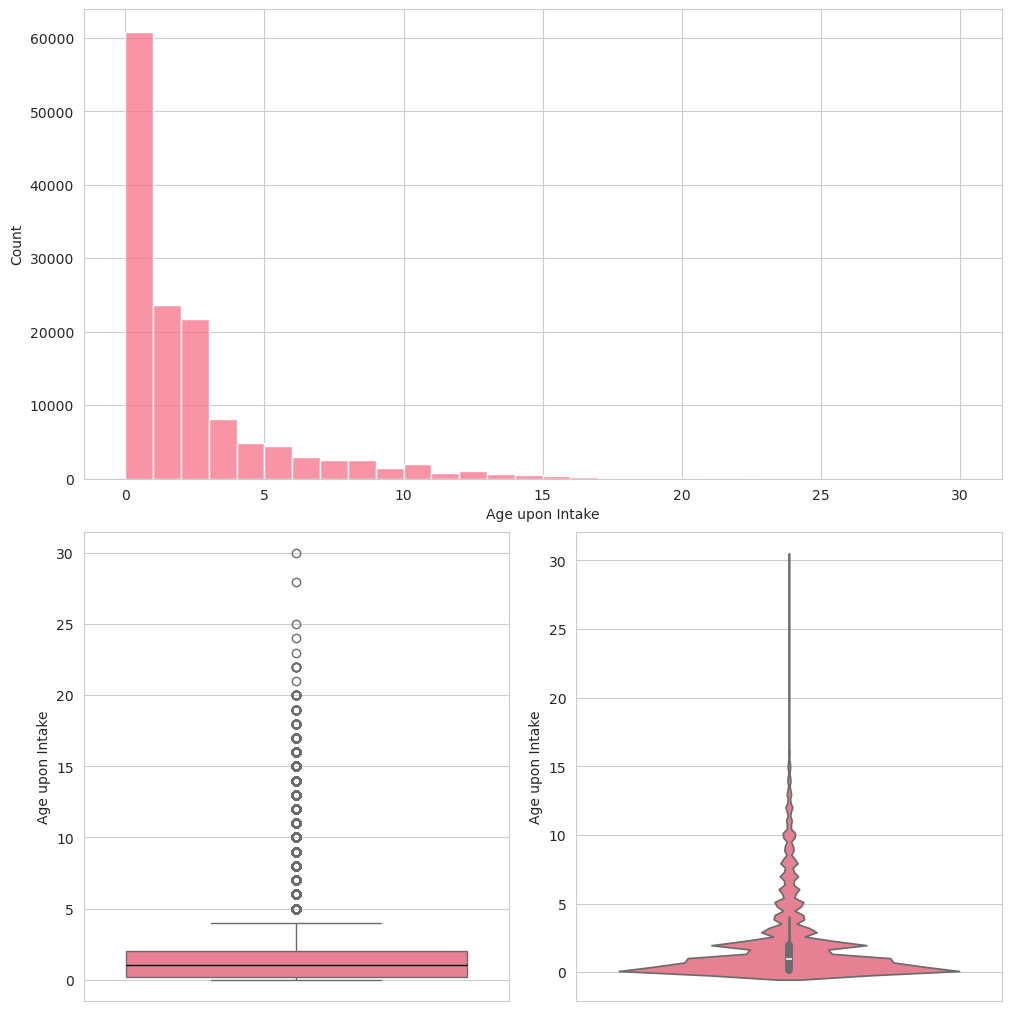

In [65]:
univariate_cont_ds(df_in, "Age upon Intake", "husl")

> ☝️ Celkově údaje ukazují, že většina přijatých zvířat je mladého věku. Je zde však i pozoruhodný počet starších zvířat.

## DateTime

In [66]:
# Ziskáme některá univariační statistiky
df_in["DateTime"].describe()

count                           138565
mean     2017-09-03 04:33:46.595749120
min                2013-10-01 07:51:00
25%                2015-08-12 18:29:00
50%                2017-07-20 16:44:00
75%                2019-07-08 11:25:00
max                2022-04-27 07:54:00
Name: DateTime, dtype: object

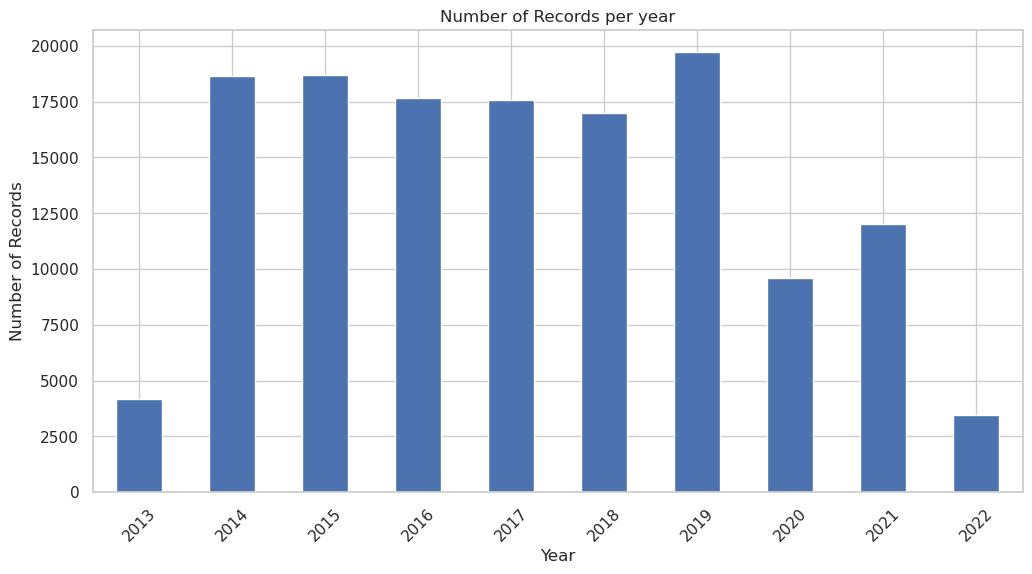

In [67]:
# Vytvoření nového sloupce pro seskupení podle dne/měsíce/roku
df_in['Year'] = df_in['DateTime'].dt.to_period('Y')  # Seskupení podle měsíce

# Seskupování dat a počítání záznamů pro každý měsíc
month_counts = df_in['Year'].value_counts().sort_index()

# Sestavíme histogram
month_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Number of Records per year')
plt.xlabel('Year')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)
plt.show()

> ☝️
> 1. V roce 2020 je pozorován výrazný pokles v počtu záznamů. 
> 2. V roce 2021 je zaznamenán mírný nárůst oproti roku 2020, avšak stále je počet záznamů nižší než v předchozích letech.
>   
> Výsledkem je, že ačkoliv byl počet záznamů mezi lety 2014 až 2019 stabilní, v posledních třech letech je patrný pokles v počtu záznamů.

## Intake Condition and Outcome Type

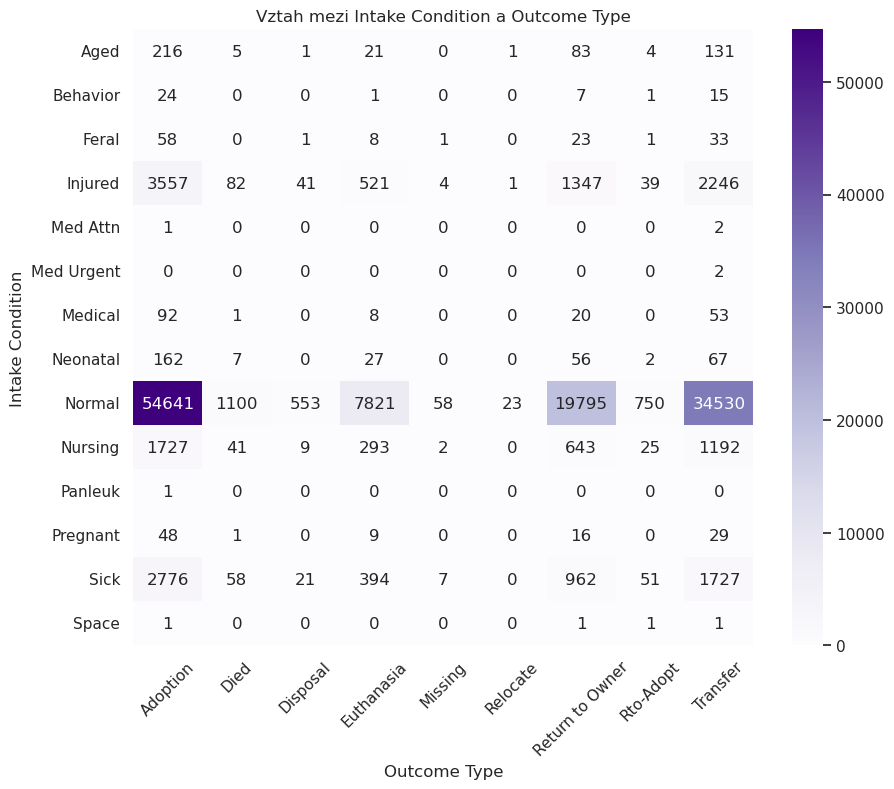

In [68]:
# Vytvoření kontingenční tabulky
crosstab = pd.crosstab(df_in['Intake Condition'], df_out['Outcome Type'])

# Vizualizace kontingenční tabulky pomocí heatmapy
plt.figure(figsize=(10, 8))
sns.heatmap(crosstab, annot=True, cmap='Purples', fmt='g')
plt.title('Vztah mezi Intake Condition a Outcome Type')
plt.ylabel('Intake Condition')
plt.xlabel('Outcome Type')
plt.xticks(rotation=45)
plt.show()

> ☝️
> Nejběžnějším stavem přijetí zvířete je "Normal", a pro tato zvířata je nejběžnějším výsledkem "Transfer", následován "Return to Owner" a "Adoption". Pokusím odsranit tento sloupec a použit logarimickou heat mapu pro lepší vizualizace.

In [34]:
# Filtrování dat
filtered_df = df_in.loc[df_in['Intake Condition'] != 'Normal']

# Vytvoření kontingenční tabulky
ct = pd.crosstab(filtered_df['Intake Condition'], df_out['Outcome Type'])

# Přidejme 1, abychom zabránili logaritmování nul
ct_log = np.log(ct + 1)

plt.figure(figsize=(10, 7))
sns.heatmap(ct_log, annot=True, cmap='purple', cbar=True)
plt.title('Logaritmická heat mapa mezi Intake Condition a Outcome Type')
plt.xticks(rotation=45)
plt.show()

NameError: name 'df_in' is not defined

> ☝️
> 1. Stav "Injured", "Sick" a "Nursing" má výrazné hodnoty pro výsledek "Euthanasia", což koreluje s vysokým procentem euthanázie pro tato zvířata.
> 2. Tyto tři stavy májí vysoké hodnoty pro "Adoption", což opět potvrzuje tendenci těchto zvířat být adoptována.
> 3. Mají také tendenci vysoké hodnoty pro "Transfer", což může být způsobeno nutností zvláštní péče.
 
Ve většině ostatních podmínek je heatmapa relativně světlá, což znamená nízké hodnoty, s několika výjimkami, které korespondují s daty z první vizualizace.

## Intake Type

In [38]:
# Funkce pro zobrazení procent, pouze pokud jsou >= 1%
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    if pct < 1:
        return ""  
    return "{:.1f}%".format(pct)

In [82]:
def func(pct, allvals):
    absolute = int(pct / 100. * np.sum(allvals))
    return "{:.1f}%".format(pct) if pct >= 5 else ''

def describe_categorical(df, column, palette_name="default"):
    '''popis kategotických příznaků'''
    sns.set_style("whitegrid")
    sns.set_palette(palette_name)

    # Výpočet frekvence a relativní frekvence
    freq = df[column].value_counts()
    rel_freq = df[column].value_counts(normalize=True) * 100

    stats_df = pd.DataFrame({
        'Kategorie': freq.index,
        'Frekvence': freq.values,
        'Relativní frekvence (%)': rel_freq.values
    })

    display(stats_df)

    # Definování палитры
    unique_categories = freq.index
    palette = sns.color_palette(palette_name, n_colors=len(unique_categories))
    color_mapping = {category: palette[i] for i, category in enumerate(unique_categories)}

    # Grafické zobrazení
    fig, axs = plt.subplots(1, 2, figsize=(17,8))

    # Výkres count plot
    bar_plot = sns.countplot(data=df, x=column, order=freq.index, palette=color_mapping, ax=axs[0])
    axs[0].set_title(f'Count Plot pro {column}')
    axs[0].tick_params(axis='x', rotation=45)

    # hodnoty nad sloupci
    for p in bar_plot.patches:
        height = int(p.get_height())
        axs[0].annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    # Koláčový graf
    values = df[column].value_counts()
    wedges, texts, autotexts = axs[1].pie(values, startangle=90, autopct=lambda pct: func(pct, values),
                                          colors=[color_mapping[val] for val in values.index])
    axs[1].legend(wedges, values.index, title=column, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    axs[1].set_title(f'Koláčový graf pro {column}')
    axs[1].set_ylabel('')

    sns.set()
    sns.set_style("whitegrid")

    plt.tight_layout()
    plt.show()

,Kategorie,Frekvence,Relativní frekvence (%)
0,Stray,95275,68.758344
1,Owner Surrender,28575,20.622091
2,Public Assist,8344,6.021723
3,Wildlife,5372,3.876881
4,Abandoned,740,0.534045
5,Euthanasia Request,259,0.186916


/tmp/ipykernel_26154/1812915869.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.countplot(data=df, x=column, order=freq.index, palette=color_mapping, ax=axs[0])


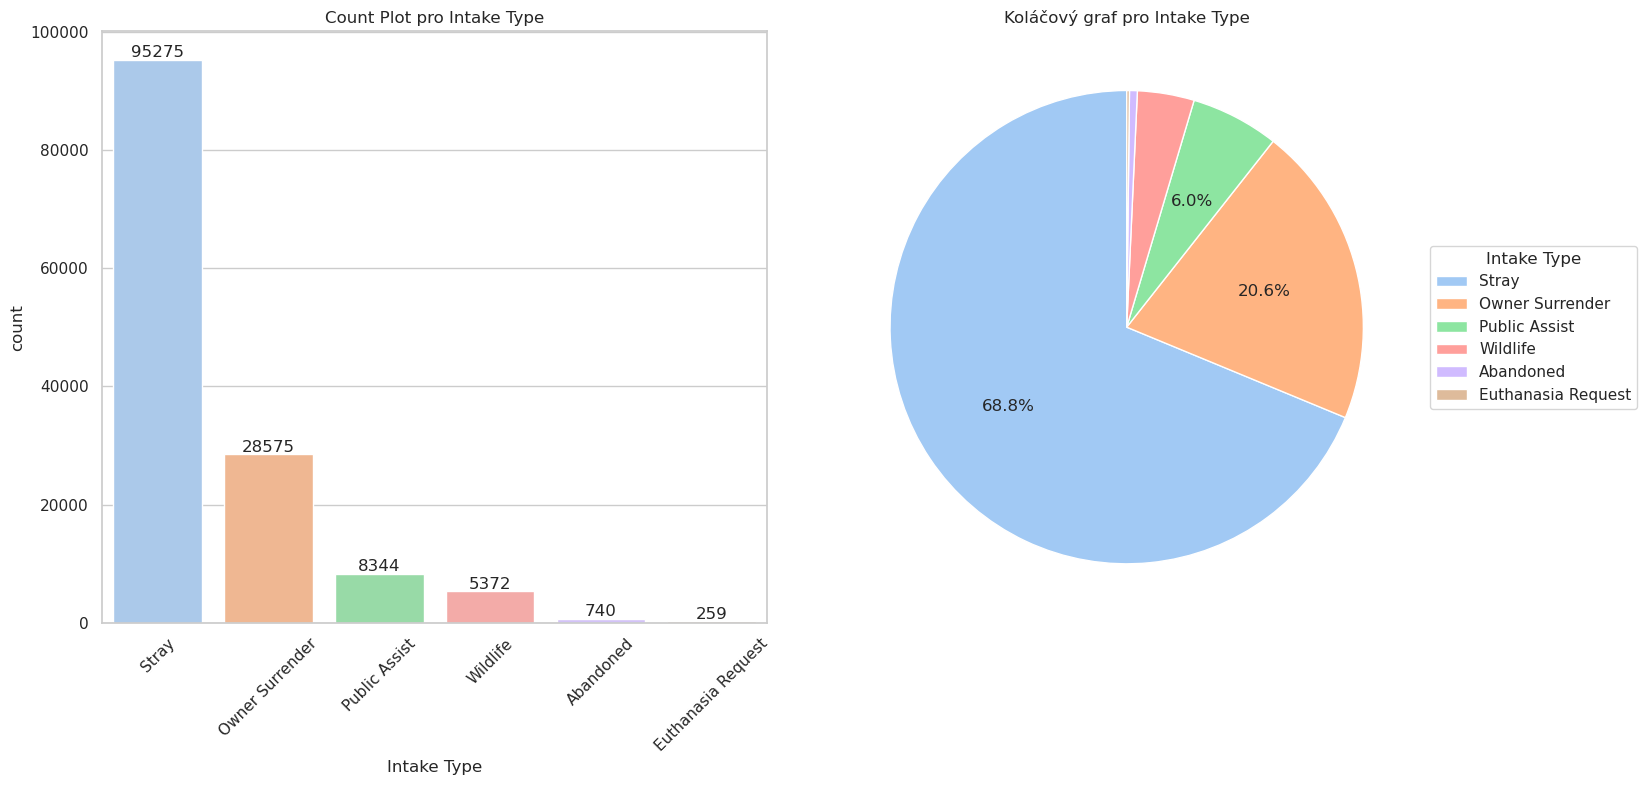

In [83]:
describe_categorical(df_in, 'Intake Type', "pastel")

☝️
> 1. Většina záznamů v df_in patří do kategorie "Stray" (toulavá zvířata), což představuje 68,8% celkového počtu.
> 2. Další největší kategorie je "Owner Surrender" (zvířata předaná majiteli) s 20,6%.
> 3. Kategorie "Public Assist", "Wildlife", "Abandoned" a "Euthanasia Request" mají výrazně menší procento v celkovém rozložení.

Celkově je většina záznamů spojena s toulavými zvířaty a zvířaty předanými jejich majiteli.

## Sex upon Intake

,Kategorie,Frekvence,Relativní frekvence (%)
0,Intact Male,45629,35.788012
1,Intact Female,43303,33.963670
2,Neutered Male,20835,16.341433
3,Spayed Female,17731,13.906885


/tmp/ipykernel_26154/1812915869.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.countplot(data=df, x=column, order=freq.index, palette=color_mapping, ax=axs[0])


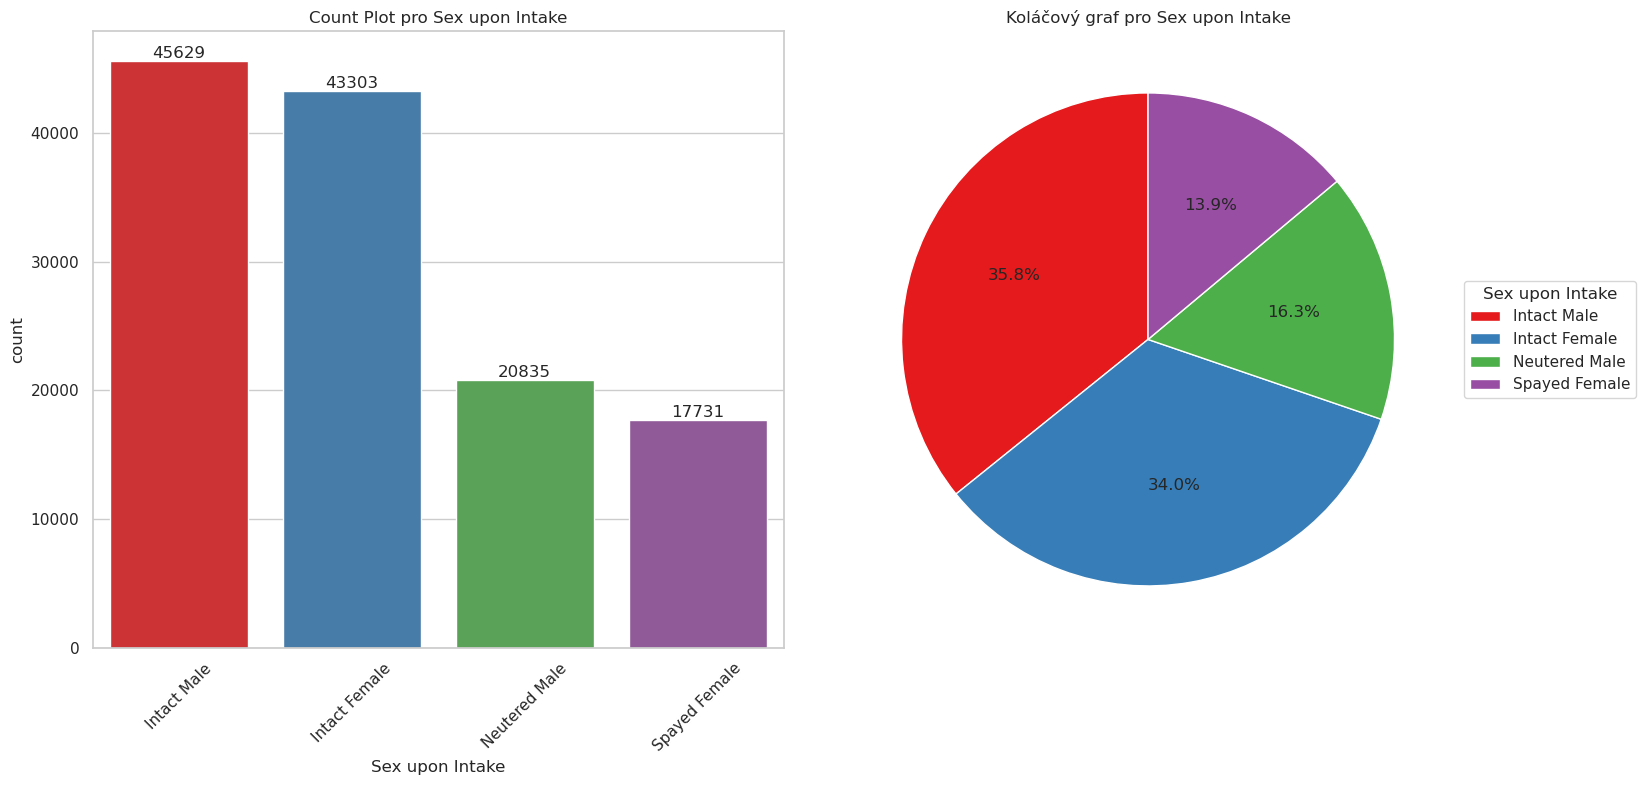

In [84]:
describe_categorical(df_in, 'Sex upon Intake', "Set1")

> ☝️
> Převážná většina zvířat je kastrovaná. Poměr kastrovaných samců a samic je téměř stejný.

## Animal Type

,Kategorie,Frekvence,Relativní frekvence (%)
0,Dog,78135,59.557293
1,Cat,52373,39.920575
2,Bird,661,0.503838
3,Livestock,24,0.018294


/tmp/ipykernel_26154/1812915869.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.countplot(data=df, x=column, order=freq.index, palette=color_mapping, ax=axs[0])


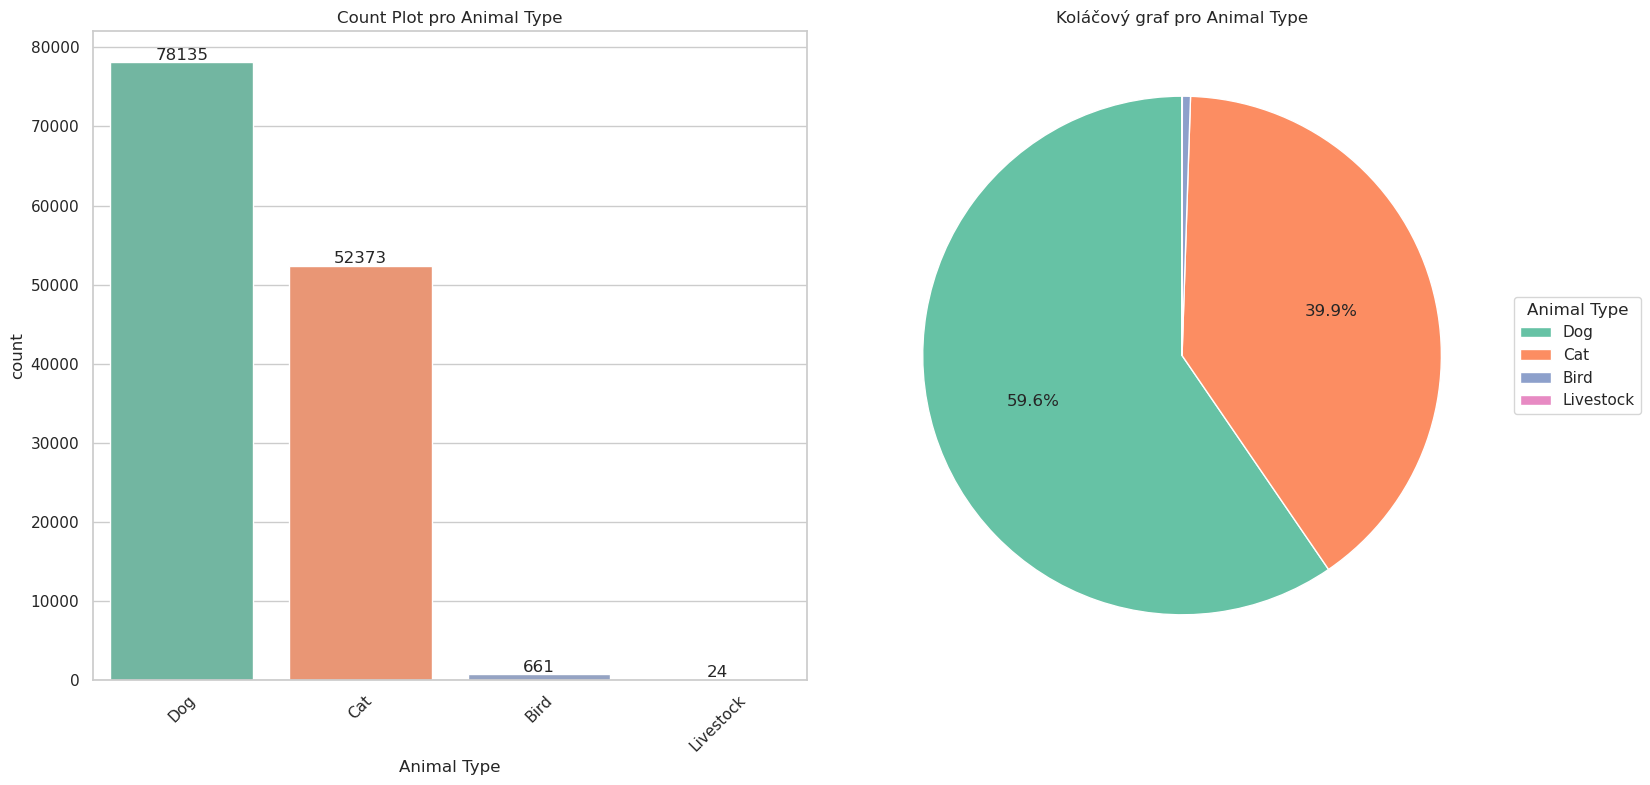

In [85]:
describe_categorical(df_in, 'Animal Type', "Set2")

> ☝️
> Z grafu můžeme vidět, že nejvíce zvířat přijatých do útulku jsou psi, následováni kočkami. Ptáci a hospodářská zvířata tvoří jen malou část z celkového počtu zvířat v útulku.

# ❓ Zadané otázky ❓

## Závisí typ odchodu zvířete z útulku (Outcome Type) na typu příchodu (Intake Type)?

> Tento heatmap je užitečný pro pochopení toho, jak různé okolnosti přijetí ovlivňují konečný stav zvířat.

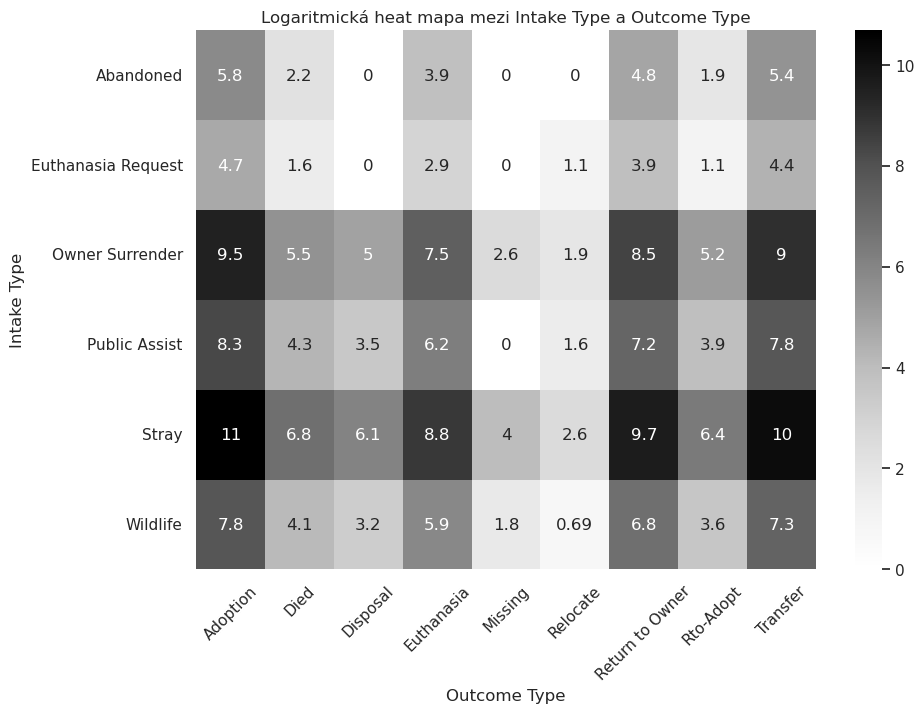

In [72]:
# Vytvoření kontingenční tabulky
ct = pd.crosstab(df_in['Intake Type'], df_out['Outcome Type'])

# Přidáme 1, abychom zabránili logaritmování nul
ct_log = np.log(ct + 1)

plt.figure(figsize=(10, 7))
sns.heatmap(ct_log, annot=True, cmap='Greys', cbar=True)
plt.title('Logaritmická heat mapa mezi Intake Type a Outcome Type')
plt.xticks(rotation=45)
plt.show()

> ☝️ Jak vidíme, tyto příznaky jsou na sobě závislé.
> 1. Abandoned:
Většina z nich je adoptována (Adoption), s menším počtem případů přechodu do jiných kategorií.
> 2. Euthanasia Request:
Čast z nich je skutečně euthanizována, ale většína je také adoptována nebo vrácena vlastníkům nebo převedena.
> 3. Owner Surrender:
Mnoho z těchto zvířat je adoptováno, mnoho se také vrací vlastníkům nebo je převedeno (Transfer).
> 4. Public Assist:
Většina je adoptována nebo převedena do jiných organizací.
> 5. Stray:
Velké množství z nich je adoptováno nebo vráceno vlastníkům. Mnoho z nich je také převedeno.
> 6. Wildlife:
Podobně Stray.

Lze pozorovat, že adopce a převod jsou dva nejběžnější výsledky pro mnoho kategorií příjmu.

## Hraje věk zvířete roli při adopci?

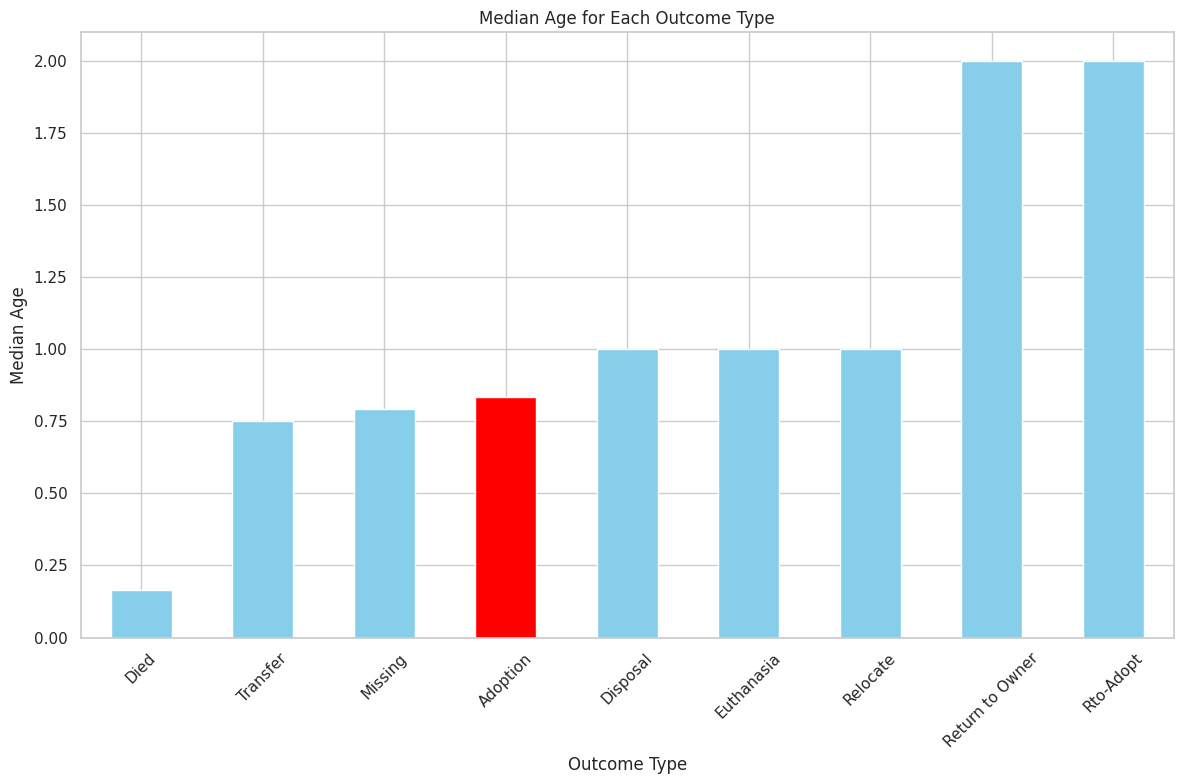

In [44]:
# Boxplot
# Seskupení podle podtypu výsledku a výpočet mediánu věku
medians = df_out.groupby('Outcome Type', observed=True)['Age upon Outcome'].median().sort_values()

colors = ['red' if outcome == 'Adoption' else 'skyblue' for outcome in medians.index]

# Zobrazení dat ve sloupcovém grafu
plt.figure(figsize=(12, 8))
medians.plot(kind='bar', color=colors)
plt.ylabel('Median Age')
plt.title('Median Age for Each Outcome Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> ☝️ U adoptovaných zvířat je průměrný věk vyšší než u "Died", "Transfer", "Missing", ale nižší než u mnoha jiných kategorií.

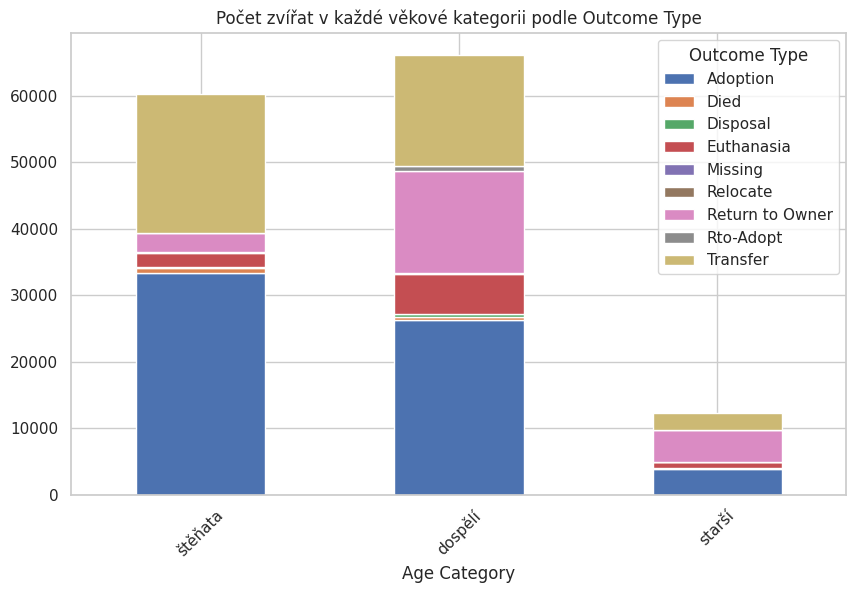

In [45]:
# Přidání kategorického sloupce na základě věku
# mé přibližné rozdělení
def age_category(age):
    if age < 1:  
        return 'štěňata'
    elif age < 7:  
        return 'dospělí'
    else:
        return 'starší'

df_out['Age Category'] = df_out['Age upon Outcome'].apply(age_category)

# mapa pro počítání
outcome_counts = df_out.groupby(['Age Category', 'Outcome Type'], observed=False).size().unstack()

# Definování pořadí kategorií
ordered_categories = ['štěňata', 'dospělí', 'starší']

# Převedení sloupce 'Age Category' na kategorický datový typ s požadovaným pořadím
df_out['Age Category'] = pd.Categorical(df_out['Age Category'], categories=ordered_categories, ordered=True)


outcome_counts = outcome_counts.reindex(ordered_categories)
outcome_counts.plot(kind='bar', stacked=True, figsize=(10, 6))


plt.title('Počet zvířat v každé věkové kategorii podle Outcome Type')
plt.xticks(rotation=45)
plt.show()

> ☝ Z grafu je zřejmé, že věková kategorie zvířete hraje významnou roli při adopci:
> 1. Štěňata mají nejvyšší míru adopce: Jejich barva na grafu, odpovídající adopci, je nejvyšší v porovnání s ostatními věkovými skupinami. To naznačuje, že lidé mají tendenci adoptovat mladší zvířata.
> 2. Dospělá zvířata jsou také často adoptována: Ačkoli jejich míra adopce je nižší ve srovnání s štěňaty, je stále významná.
> 3. Starší zvířata mají nejnižší míru adopce: V porovnání s ostatními věkovými skupinami je pro starší zvířata obtížnější najít nový domov.

## Je příjem zvířat v rámci roku konstantní nebo existují období s větší/nižší zátěží?


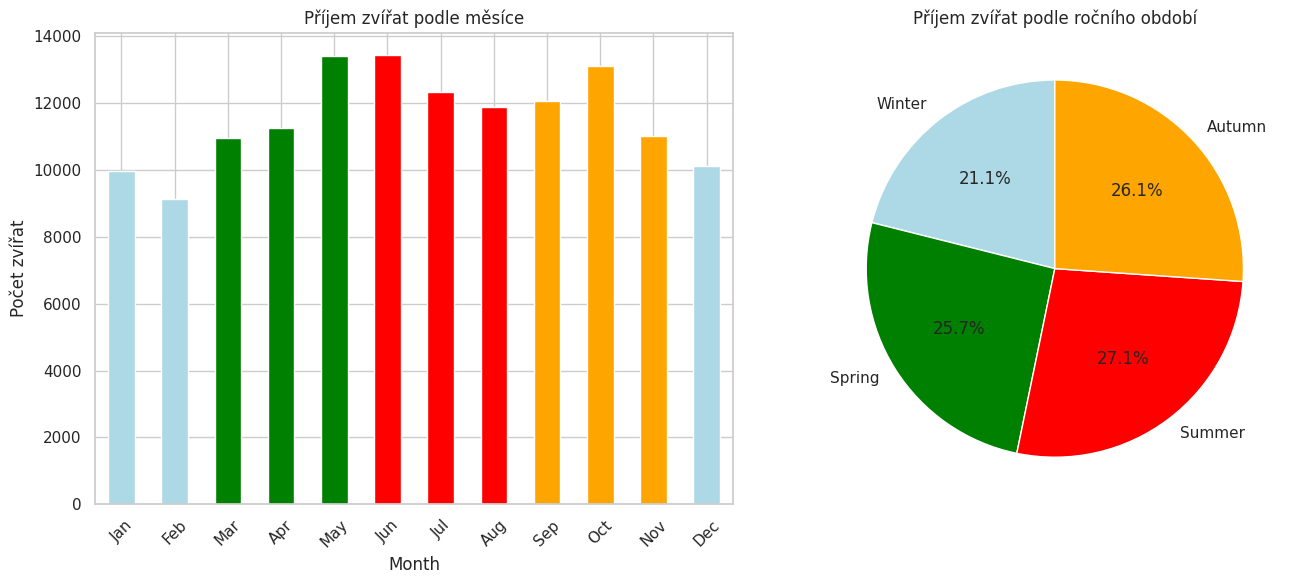

In [46]:
# Výběr měsíce a ročního období
df_in["Month"] = df_in["DateTime"].dt.strftime('%b')
df_in["Season"] = df_in["DateTime"].dt.month%12 // 3 + 1
df_in["Season"] = df_in["Season"].replace({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'})

# Barevná paleta pro roční období
season_colors = {
    'Winter': 'lightblue',
    'Spring': 'green',
    'Summer': 'red',
    'Autumn': 'orange'
}

# Definuju měsíce pro každé roční období
months_by_season = {
    'Winter': ['Dec', 'Jan', 'Feb'],
    'Spring': ['Mar', 'Apr', 'May'],
    'Summer': ['Jun', 'Jul', 'Aug'],
    'Autumn': ['Sep', 'Oct', 'Nov']
}

plt.figure(figsize=(14,6))

bar_colors = [season_colors[season] for month in df_in["Month"].value_counts().reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']).index for season, months in months_by_season.items() if month in months]
# Graf podle měsíce
plt.subplot(1, 2, 1)
df_in["Month"].value_counts().reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 

                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']).plot(kind='bar', color=bar_colors)
plt.title("Příjem zvířat podle měsíce")
plt.xticks(rotation=45)
plt.ylabel("Počet zvířat")

# Koláčový graf podle ročních období
plt.subplot(1, 2, 2)
season_counts = df_in["Season"].value_counts().reindex(['Winter', 'Spring', 'Summer', 'Autumn'])
season_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=[season_colors[s] for s in season_counts.index])
plt.title("Příjem zvířat podle ročního období")
plt.ylabel("")

plt.tight_layout()
plt.show()

> ☝️ Z těchto pozorování můžeme vyvodit, že příjem zvířat v průběhu roku není konstantní. Sice na jaře, v létě a na podzim je příjem zvířat téměř
stejný, ale v zimě čísla trochu klesají - zimní měsíce mají nejnižší počet přijatých zvířat. Nejrušnějšími měsíci pro útulek jsou květen a červen.


# ❓ Vlastní otázky ❓

## Příprava dat z locations.csv

In [47]:
#postup je stejný jako u intakes a outcomes
df_loc = pd.read_csv("locations.csv")
df_loc.head()

,Animal ID,Found Location,At AAC,Intake Date,Type,Looks Like,Color,Sex,Age,Image Link
0,A855691,"811 BURNSALL GATES DR78660\n(30.417121, -97.64...",Yes (come to the shelter),04/22/2022,Dog,Pit Bull Mix,Gray/White,Intact Male,2 years,http://www.petharbor.com/pet.asp?uaid=ASTN.A85...
1,A855620,8203 COLONY LOOP DRIVE\nAUSTIN 78724\n(30.2971...,Yes (come to the shelter),04/20/2022,Dog,Cairn Terrier Mix,Tan,Intact Male,3 months,http://www.petharbor.com/pet.asp?uaid=ASTN.A85...
2,A855431,1016 SOUTH MEADOWS DR\nAUSTIN 78758\n(30.37603...,No (contact for more info),04/18/2022,Cat,Domestic Shorthair,Black/White,Intact Male,4 weeks,http://www.petharbor.com/pet.asp?uaid=ASTN.A85...
3,A855432,1016 SOUTH MEADOWS DR\nAUSTIN 78758\n(30.37603...,No (contact for more info),04/18/2022,Cat,Domestic Shorthair,Black/White,Intact Female,4 weeks,http://www.petharbor.com/pet.asp?uaid=ASTN.A85...
4,A855461,"AUSTIN COLONY BLVD AUSTIN 78725\n(30.242394, -...",No (contact for more info),04/18/2022,Cat,Siamese,Flame Point,Intact Female,6 weeks,http://www.petharbor.com/pet.asp?uaid=ASTN.A85...


In [48]:
df_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Animal ID       102 non-null    object
 1   Found Location  102 non-null    object
 2   At AAC          102 non-null    object
 3   Intake Date     102 non-null    object
 4   Type            102 non-null    object
 5   Looks Like      102 non-null    object
 6   Color           102 non-null    object
 7   Sex             102 non-null    object
 8   Age             102 non-null    object
 9   Image Link      102 non-null    object
dtypes: object(10)
memory usage: 8.1+ KB


In [49]:
df_loc.describe()

,Animal ID,Found Location,At AAC,Intake Date,Type,Looks Like,Color,Sex,Age,Image Link
count,102,102,102,102,102,102,102,102,102,102
unique,102,70,2,7,2,32,35,5,23,102
top,A855691,"6422 MARR COVE\nAUSTIN 78724\n(30.291657, -97....",Yes (come to the shelter),04/22/2022,Cat,Domestic Shorthair,Black/White,Intact Male,2 years,http://www.petharbor.com/pet.asp?uaid=ASTN.A85...
freq,1,10,78,27,52,35,12,43,19,1


In [50]:
df_loc = df_loc.drop(["Image Link"], axis=1)

In [51]:
# Další slova nám mohou porušovat prehlednost
def normalize_AAC(str):
    if "Yes" in str:
        return "Yes"
    else:
        return "No"

df_loc["At AAC"] = df_loc["At AAC"].apply(normalize_AAC)

In [52]:
df_loc.head()

,Animal ID,Found Location,At AAC,Intake Date,Type,Looks Like,Color,Sex,Age
0,A855691,"811 BURNSALL GATES DR78660\n(30.417121, -97.64...",Yes,04/22/2022,Dog,Pit Bull Mix,Gray/White,Intact Male,2 years
1,A855620,8203 COLONY LOOP DRIVE\nAUSTIN 78724\n(30.2971...,Yes,04/20/2022,Dog,Cairn Terrier Mix,Tan,Intact Male,3 months
2,A855431,1016 SOUTH MEADOWS DR\nAUSTIN 78758\n(30.37603...,No,04/18/2022,Cat,Domestic Shorthair,Black/White,Intact Male,4 weeks
3,A855432,1016 SOUTH MEADOWS DR\nAUSTIN 78758\n(30.37603...,No,04/18/2022,Cat,Domestic Shorthair,Black/White,Intact Female,4 weeks
4,A855461,"AUSTIN COLONY BLVD AUSTIN 78725\n(30.242394, -...",No,04/18/2022,Cat,Siamese,Flame Point,Intact Female,6 weeks


In [53]:
find_none(df_loc)

Column: Animal ID
Number of unique values: 102
Number of missing values: 0
First 50 unique values: ['A855691' 'A855620' 'A855431' 'A855432' 'A855461' 'A855780' 'A855791'
 'A855498' 'A720883' 'A855702' 'A855497' 'A855499' 'A855496' 'A855795'
 'A855692' 'A855708' 'A855776' 'A855704' 'A855649' 'A854552' 'A855562'
 'A855563' 'A855743' 'A855746' 'A855457' 'A855662' 'A855504' 'A855652'
 'A855666' 'A855395' 'A855661' 'A855750' 'A855727' 'A855741' 'A855742'
 'A855718' 'A855772' 'A855650' 'A855749' 'A855589' 'A855658' 'A855667'
 'A855579' 'A855717' 'A855591' 'A855425' 'A855428' 'A855429' 'A855659'
 'A855537']
------------------------------
Column: Found Location
Number of unique values: 70
Number of missing values: 0
First 50 unique values: ['811 BURNSALL GATES DR78660\n(30.417121, -97.648161)'
 '8203 COLONY LOOP DRIVE\nAUSTIN 78724\n(30.297199, -97.628538)'
 '1016 SOUTH MEADOWS DR\nAUSTIN 78758\n(30.376034, -97.696192)'
 'AUSTIN COLONY BLVD AUSTIN 78725\n(30.242394, -97.615386)'
 '6906 MEADOW 

In [54]:
df_loc = df_loc.replace(["Unknown"], np.nan)

In [55]:
# Převedení vhodných sloupců na kategorické příznaky
columns_to_convert = ['At AAC', 'Intake Date', 'Type', 'Sex']
for col in columns_to_convert:
    df_loc[col] = df_loc[col].astype('category')

In [56]:
df_loc["Age"].describe()

count         102
unique         23
top       2 years
freq           19
Name: Age, dtype: object

In [57]:
# Převod sloupce Age na věk v měsícíc
def convert_age_to_months(age_str):
    if pd.isna(age_str):
        return age_str
    num, unit = age_str.split()
    num = int(num)
    if "year" in unit:
        return num * 12
    elif "month" in unit:
        return num
    elif "week" in unit:
        return num / 4  # za předpokladu, že v měsíci jsou čtyři týdny
    elif "day" in unit:
        return num / 30  # za předpokladu, že měsíc má 30 dní
    else:
        return None

df_loc['Age'] = df_loc['Age'].apply(convert_age_to_months)

In [58]:
# Podívejme se, jestli máme duplicitní data
loc_duplicates_count = len(df_loc)- len(df_loc.drop_duplicates ())
print(f"Number of duplicate rows in df_loc: {in_duplicates_count}")

Number of duplicate rows in df_loc: 20


In [59]:
df_loc.drop_duplicates()

,Animal ID,Found Location,At AAC,Intake Date,Type,Looks Like,Color,Sex,Age
0,A855691,"811 BURNSALL GATES DR78660\n(30.417121, -97.64...",Yes,04/22/2022,Dog,Pit Bull Mix,Gray/White,Intact Male,24.00
1,A855620,8203 COLONY LOOP DRIVE\nAUSTIN 78724\n(30.2971...,Yes,04/20/2022,Dog,Cairn Terrier Mix,Tan,Intact Male,3.00
2,A855431,1016 SOUTH MEADOWS DR\nAUSTIN 78758\n(30.37603...,No,04/18/2022,Cat,Domestic Shorthair,Black/White,Intact Male,1.00
3,A855432,1016 SOUTH MEADOWS DR\nAUSTIN 78758\n(30.37603...,No,04/18/2022,Cat,Domestic Shorthair,Black/White,Intact Female,1.00
4,A855461,"AUSTIN COLONY BLVD AUSTIN 78725\n(30.242394, -...",No,04/18/2022,Cat,Siamese,Flame Point,Intact Female,1.50
...,...,...,...,...,...,...,...,...,...
97,A855529,AIRPORT\nAUSTIN 78702,No,04/19/2022,Cat,Domestic Shorthair,Brown Tabby,Intact Female,1.25
98,A855469,"AUSTIN 78741\n(30.227985, -97.716971)",Yes,04/18/2022,Cat,Domestic Shorthair,Calico,Spayed Female,48.00
99,A855533,"AUSTIN 78702\n(30.264271, -97.71608)",Yes,04/19/2022,Dog,Pit Bull,Brown,Intact Male,5.00
100,A855462,"AUSTIN COLONY BLVD AUSTIN 78725\n(30.242394, -...",No,04/18/2022,Cat,Domestic Shorthair,Cream Tabby/White,Intact Male,1.50


In [60]:
len(df_loc)- len(df_loc.drop_duplicates ())

0

In [61]:
df_loc.head()

,Animal ID,Found Location,At AAC,Intake Date,Type,Looks Like,Color,Sex,Age
0,A855691,"811 BURNSALL GATES DR78660\n(30.417121, -97.64...",Yes,04/22/2022,Dog,Pit Bull Mix,Gray/White,Intact Male,24.0
1,A855620,8203 COLONY LOOP DRIVE\nAUSTIN 78724\n(30.2971...,Yes,04/20/2022,Dog,Cairn Terrier Mix,Tan,Intact Male,3.0
2,A855431,1016 SOUTH MEADOWS DR\nAUSTIN 78758\n(30.37603...,No,04/18/2022,Cat,Domestic Shorthair,Black/White,Intact Male,1.0
3,A855432,1016 SOUTH MEADOWS DR\nAUSTIN 78758\n(30.37603...,No,04/18/2022,Cat,Domestic Shorthair,Black/White,Intact Female,1.0
4,A855461,"AUSTIN COLONY BLVD AUSTIN 78725\n(30.242394, -...",No,04/18/2022,Cat,Siamese,Flame Point,Intact Female,1.5


## 1. Existují významné rozdíly v průměrném věku mezi zvířaty v AAC a u dobrovolníků?

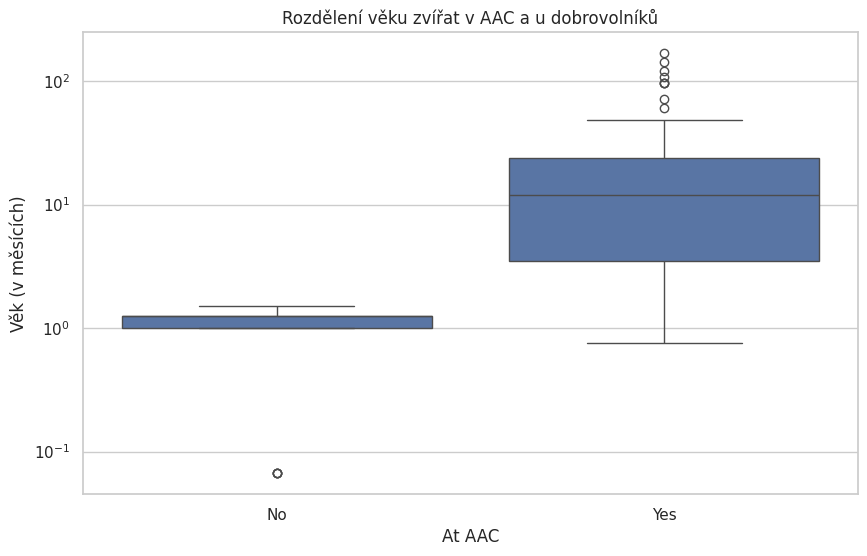

In [62]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="At AAC", y="Age", data=df_loc)

# kvůli velkému rozptylu
plt.yscale("log")


plt.title("Rozdělení věku zvířat v AAC a u dobrovolníků")
plt.ylabel("Věk (v měsících)")
plt.xlabel("At AAC")
plt.show()

> ☝️
> 
> Zvířata v útulku:
> Věk zvířat v útulku se značně liší, jak je patrné z širšího "rámečku" na grafu. To může znamenat, že v útulku jsou jak mladá, tak stará zvířata.
> Průměrný věk (medián) zvířat v útulku je vyšší.
Je zde několik odlehlých hodnot, což naznačuje, že v útulku je několik obzvláště mladých zvířat.
> 
> Zvířata u dobrovolníků: 
> Věk těchto zvířat je mnohem nižší a věkové rozpětí je malé, jak je patrné z úzkého "rámečku" v grafu. Všeschna zvířata jsou májí věk < 2 měsíce.
> 
> Na základě tohoto grafu by se dalo usuzovat, že zvířata v útulku jsou v průměru starší než zvířata mimo útulek.

## 2. Závisí typ zvířete na věku jeho přijetí do útulku? (jenom v df_loc)

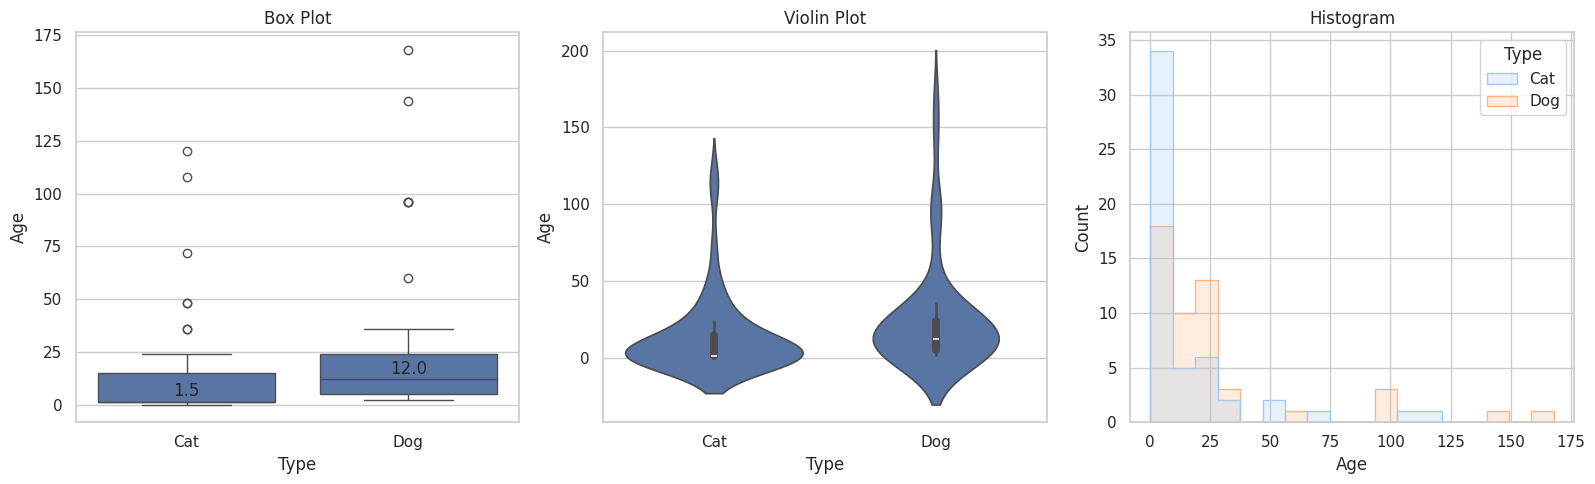

In [63]:
# převzato z cvičení 2
n_categories = df_loc['Type'].nunique()
fig, axes = plt.subplots(1, 3, figsize=(16,5))
palette = sns.color_palette("pastel")
sns.set_palette(palette)

# Box plot
box_plot = sns.boxplot(data=df_loc, x='Type', y='Age', ax=axes[0])
medians = df_loc.groupby('Type', observed=True)['Age'].median()
# offset from median for display
vertical_offset = df_loc['Age'].max() * 0.015

for xtick in box_plot.get_xticks():
    box_plot.text(xtick, medians.iloc[xtick] + vertical_offset, medians.iloc[xtick], horizontalalignment='center')
axes[0].set_title('Box Plot')

# Violin plot
sns.violinplot(data=df_loc, x='Type', y='Age', ax=axes[1])
axes[1].set_title('Violin Plot')

# Histogram
sns.histplot(
    data=df_loc, x='Age', hue='Type', element='step', 
    palette=palette[:n_categories], ax=axes[2]
).set(title='Histogram')

plt.tight_layout()
plt.show()

> ☝️ Z těchto pozorování můžeme usoudit, že typ zvířete závisí na věku jeho přijetí do útulku, ale ne tak moc.
>
> Průměrný věk koček je jeden a půl měsíc, u psů - 12.
Mladých zvířat, která strávila v útulku méně než 7 dní, je mnohem více. Avšak u psů můžeme pozorovat větší rozptyl věku při přijetí, což naznačuje, že psi různých věkových kategorií častěji travili méně než 7 dní v útulku.

## 3. Závisí typ zvířete na tom, zda je u dobrovolníků?

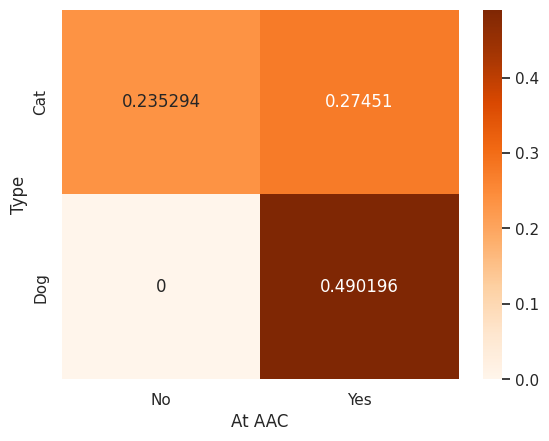

In [64]:
frequency_table = pd.crosstab(df_loc['Type'], df_loc['At AAC'])
sns.heatmap(frequency_table.div(len(df_loc)), cmap='Oranges', annot=True, fmt='g')
plt.show()

> ☝️ Na základě těchto výsledků lze říci, že typ zvířete závisí na tom, zda je u dobrovolníků. Zatímco psi jsou vždy v útulku, kočky mají téměř rovnoměrnou distribuci mezi těmi, kteří jsou a nejsou u dobrovolníků.

## P.S. 

> Použité zdroje:
> 1. Notebooky ze cvičení 1. a 2. Snažil jsem dělat sám, ale je to těžké, když vidíte fungující kód.
> 2. Chat GPT. Většinou technické otázky související s prací s knihovnami. 
>
> Děkuji za úkol